In [106]:
model.

AttributeError: 'Booster' object has no attribute 'get_params'

In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize

#
# Prepare the data
#

train = pd.read_csv('train.csv',sep=';')
columns = ['cash_in_out','display_type','scanner_code_reader','atm_id']
train.drop(columns, inplace=True, axis=1)

# get the labels
y = train.target.values
train.drop(['target'], inplace=True, axis=1)

x = normalize(train.values)
#
# Create training and validation sets
#
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
#
# Create the LightGBM data containers
#

train_data = lightgbm.Dataset(x, label=y)
test_data = lightgbm.Dataset(x_test, label=y_test)

#w = np.random.rand(903, )
#train_data.set_weight(w)

#
# Train the model
#

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': ['auc'],
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 20,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.03,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)


print('Save model...')
# save model to file
# AUC 0.67 - 70 
# AUC 0.65 - 65
model.save_model('model.txt')

[1]	valid_0's auc: 0.619017
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.646408
[3]	valid_0's auc: 0.656448
[4]	valid_0's auc: 0.655766
[5]	valid_0's auc: 0.65728
[6]	valid_0's auc: 0.655999
[7]	valid_0's auc: 0.655052
[8]	valid_0's auc: 0.654392
[9]	valid_0's auc: 0.654554
[10]	valid_0's auc: 0.654693
[11]	valid_0's auc: 0.652913
[12]	valid_0's auc: 0.654434
[13]	valid_0's auc: 0.655864
[14]	valid_0's auc: 0.655635
[15]	valid_0's auc: 0.655996
[16]	valid_0's auc: 0.657668
[17]	valid_0's auc: 0.658778
[18]	valid_0's auc: 0.658712
[19]	valid_0's auc: 0.659094
[20]	valid_0's auc: 0.658055
[21]	valid_0's auc: 0.660802
[22]	valid_0's auc: 0.661323
[23]	valid_0's auc: 0.662167
[24]	valid_0's auc: 0.661665
[25]	valid_0's auc: 0.661933
[26]	valid_0's auc: 0.662651
[27]	valid_0's auc: 0.663544
[28]	valid_0's auc: 0.664252
[29]	valid_0's auc: 0.664889
[30]	valid_0's auc: 0.665591
[31]	valid_0's auc: 0.664148
[32]	valid_0's auc: 0.664227
[33]	valid_0's auc:

In [67]:
#
# Create a submission
#
test = pd.read_csv('test.csv',sep=';')
columns = ['cash_in_out','display_type','scanner_code_reader']
test.drop(columns, inplace=True, axis=1)
x = test.values
#submission = pd.read_csv('out.csv')
ids = test['atm_id'].values
#submission.drop('ATM_ID', inplace=True, axis=1)

y = model.predict(x, num_iteration=model.best_iteration)
y = [1 if i >=np.mean(y) else 0 for i in y]
output = pd.DataFrame({'ATM_ID': ids, 'PREDICT': y})
output.to_csv("out.csv", index=False)

AttributeError: 'LGBMClassifier' object has no attribute 'best_iteration'

In [131]:
output

,ATM_ID,PREDICT
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,0


In [132]:
output.shape

(351, 2)

In [107]:
from sklearn.model_selection import GridSearchCV
estimator = lightgbm.LGBMRegressor(objective='binary')
param_grid = {
    'num_leaves': [x for x in range(15, 20, 25)],
    'metric': ('l1', 'l2')
}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(x, y,
        eval_set=[(x_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

print('Best parameters found by grid search are:', gridsearch.best_params_)



[1]	valid_0's binary_logloss: 0.682792	valid_0's auc: 0.653115
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.675516	valid_0's auc: 0.659165
[3]	valid_0's binary_logloss: 0.670472	valid_0's auc: 0.659964
[4]	valid_0's binary_logloss: 0.66513	valid_0's auc: 0.663521
[5]	valid_0's binary_logloss: 0.660128	valid_0's auc: 0.671922
[6]	valid_0's binary_logloss: 0.65725	valid_0's auc: 0.670657
[7]	valid_0's binary_logloss: 0.654659	valid_0's auc: 0.670533
[8]	valid_0's binary_logloss: 0.651747	valid_0's auc: 0.673342
[9]	valid_0's binary_logloss: 0.649196	valid_0's auc: 0.676471
[10]	valid_0's binary_logloss: 0.646056	valid_0's auc: 0.680445
[11]	valid_0's binary_logloss: 0.644844	valid_0's auc: 0.680386
[12]	valid_0's binary_logloss: 0.643597	valid_0's auc: 0.680713
[13]	valid_0's binary_logloss: 0.642505	valid_0's auc: 0.68104
[14]	valid_0's binary_logloss: 0.64059	valid_0's auc: 0.683162
[15]	valid_0's binary_logloss: 0.639346	valid_0's auc: 0

[6]	valid_0's binary_logloss: 0.657813	valid_0's auc: 0.668274
[7]	valid_0's binary_logloss: 0.653953	valid_0's auc: 0.67189
[8]	valid_0's binary_logloss: 0.652126	valid_0's auc: 0.670601
[9]	valid_0's binary_logloss: 0.650566	valid_0's auc: 0.670201
[10]	valid_0's binary_logloss: 0.648873	valid_0's auc: 0.671426
[11]	valid_0's binary_logloss: 0.647795	valid_0's auc: 0.671184
[12]	valid_0's binary_logloss: 0.645827	valid_0's auc: 0.67352
[13]	valid_0's binary_logloss: 0.644409	valid_0's auc: 0.674924
[14]	valid_0's binary_logloss: 0.643712	valid_0's auc: 0.674997
[15]	valid_0's binary_logloss: 0.643315	valid_0's auc: 0.674521
[16]	valid_0's binary_logloss: 0.641692	valid_0's auc: 0.676538
[17]	valid_0's binary_logloss: 0.641773	valid_0's auc: 0.675442
[18]	valid_0's binary_logloss: 0.641551	valid_0's auc: 0.675489
[19]	valid_0's binary_logloss: 0.640556	valid_0's auc: 0.677097
[20]	valid_0's binary_logloss: 0.640363	valid_0's auc: 0.677011
[21]	valid_0's binary_logloss: 0.639905	valid_

In [99]:
model = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.2, max_depth=-1, metric='l1', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=20,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)
model.fit(x, y,
          eval_set=[(x_test, y_test)],
          eval_metric=['auc', 'binary_logloss'],
          early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.677879	valid_0's auc: 0.626847
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.667967	valid_0's auc: 0.63561
[3]	valid_0's binary_logloss: 0.661012	valid_0's auc: 0.646134
[4]	valid_0's binary_logloss: 0.655711	valid_0's auc: 0.652936
[5]	valid_0's binary_logloss: 0.655922	valid_0's auc: 0.64976
[6]	valid_0's binary_logloss: 0.656742	valid_0's auc: 0.648456
[7]	valid_0's binary_logloss: 0.655317	valid_0's auc: 0.651826
[8]	valid_0's binary_logloss: 0.654937	valid_0's auc: 0.653522
[9]	valid_0's binary_logloss: 0.655012	valid_0's auc: 0.655104
[10]	valid_0's binary_logloss: 0.656564	valid_0's auc: 0.654549
[11]	valid_0's binary_logloss: 0.655547	valid_0's auc: 0.657709
[12]	valid_0's binary_logloss: 0.657146	valid_0's auc: 0.657525
[13]	valid_0's binary_logloss: 0.659088	valid_0's auc: 0.655847
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.654937	valid_0's auc: 0.653522


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.2, max_depth=-1, metric='l1', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=20,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

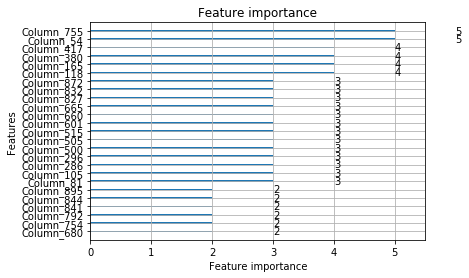

In [100]:
import matplotlib.pyplot as plt
ax = lightgbm.plot_importance(gbm, max_num_features=25)
plt.show()

In [101]:
gridsearch.predict(x_test).shape

(1257,)

In [84]:
test = pd.read_csv('test.csv',sep=';')
ids = test['atm_id'].values
columns = ['cash_in_out','display_type','scanner_code_reader','atm_id']
test.drop(columns, inplace=True, axis=1)
x = test.values

#submission.drop('ATM_ID', inplace=True, axis=1)

y = model.predict(x)
y = [1 if i >=np.mean(y) else 0 for i in y]
output = pd.DataFrame({'ATM_ID': ids, 'PREDICT': y})
output.to_csv("out.csv", index=False)